## **Import Library**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


## **Import Dataset**

In [47]:
df = pd.read_csv('/content/churn_prediction.csv')
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18844,20115,3066,68,Female,0.0,self_employed,834.0,2,460,193.0,...,2440.74,2440.74,2425.32,0.31,0.31,0.31,0.31,2440.74,2440.74,0
18845,20116,2922,50,Male,0.0,self_employed,1614.0,3,3000,4.0,...,1380.39,2593.43,1688.51,11830.14,662.51,5400.37,357.51,4222.19,1224.66,0
18846,20117,1296,28,Male,0.0,self_employed,656.0,2,1397,32.0,...,2681.58,3272.20,2420.69,0.03,262.80,1305.30,848.37,2462.53,3590.59,1
18847,20119,2711,76,Female,0.0,self_employed,334.0,1,323,NaN,...,1387.00,1781.31,1815.00,0.04,0.04,22142.90,0.04,2568.29,1387.00,0


## **Data Analisis & Data Cleaning**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18849 entries, 0 to 18848
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     18849 non-null  int64  
 1   vintage                         18849 non-null  int64  
 2   age                             18849 non-null  int64  
 3   gender                          18492 non-null  object 
 4   dependents                      17248 non-null  float64
 5   occupation                      18794 non-null  object 
 6   city                            18325 non-null  float64
 7   customer_nw_category            18849 non-null  int64  
 8   branch_code                     18849 non-null  int64  
 9   days_since_last_transaction     16709 non-null  float64
 10  current_balance                 18849 non-null  float64
 11  previous_month_end_balance      18849 non-null  float64
 12  average_monthly_balance_prevQ   

In [49]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             357
dependents                        1601
occupation                          55
city                               524
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       2140
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [50]:
# Membuat variabel baru dengan nama class_null dan class1_null sebagai wadah untuk mengelompokan beberapa kolom
class_null = ['gender', 'occupation']
class1_null = ['dependents','city','days_since_last_transaction']

In [51]:
# Mengisi mising value untuk kelompok class_null dengan mode(modus) dan missing value di kelompok class1_null dengan mean(rata_rata)
df[class_null] = df[class_null].fillna(df[class_null].mode().iloc[0])
df[class1_null] = df[class1_null].fillna(df[class1_null].mean())

In [52]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

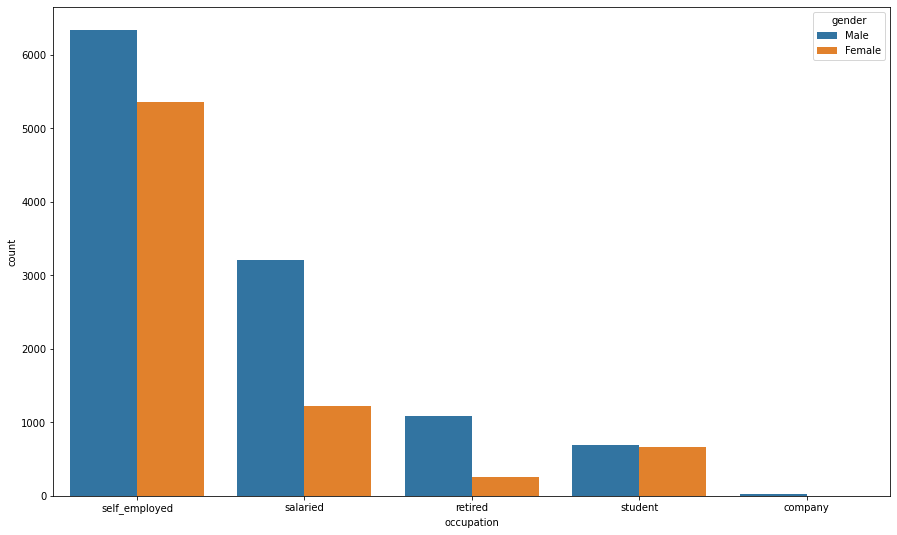

In [53]:
plt.figure(figsize=(15, 9))
sns.countplot(data = df, x = 'occupation', hue = 'gender')

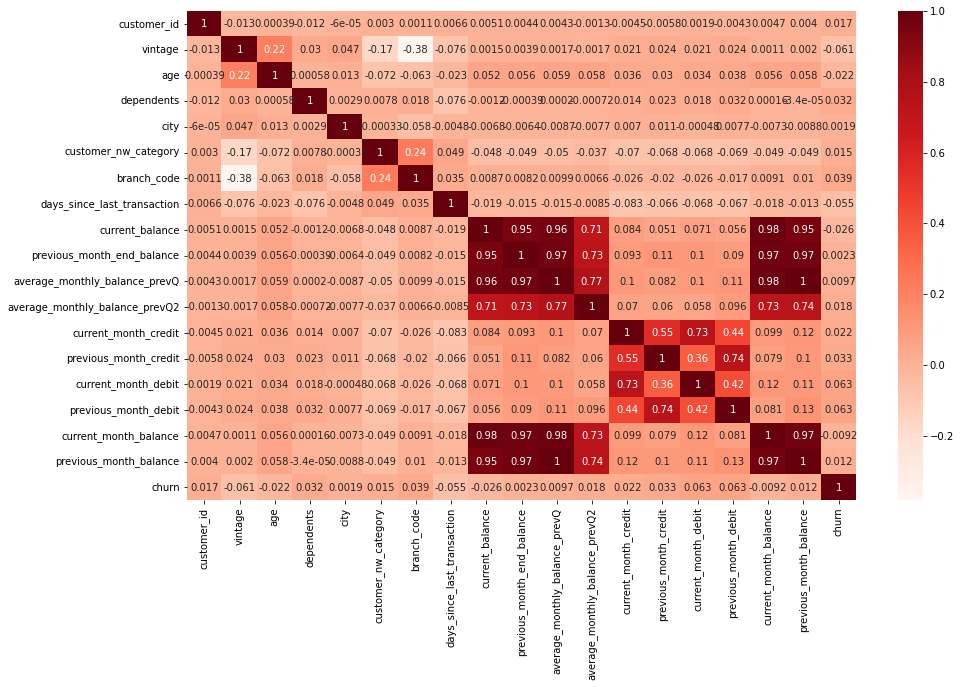

In [54]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, cmap ='Reds')

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['occupation'] = le.fit_transform(df['occupation'])

In [56]:
df['gender'].value_counts()

1    11347
0     7502
Name: gender, dtype: int64

In [57]:
df['occupation'].value_counts()

3    11687
2     4437
4     1366
1     1336
0       23
Name: occupation, dtype: int64

## **Data Training Dan Data Testing**

In [58]:
x = df.drop(['churn'], axis=1)
y = df['churn']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size= 0.25)

In [60]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [61]:
def models(x_train, y_train):
  # 1 LogisticRegression
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(x_train,y_train)

  # 2 Decission Tree Classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier()
  tree.fit(x_train, y_train)

  # 3 Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest= RandomForestClassifier()
  forest.fit(x_train, y_train)

  # 4 SVC
  from sklearn.svm import SVC
  svc = SVC()
  svc.fit(x_train, y_train)

  # 5 Naive Bayes
  from sklearn.naive_bayes import GaussianNB
  nb = GaussianNB()
  nb.fit(x_train,y_train)

  # 6 KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)

  # 7 Xgboots
  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(x_train, y_train)

  print('LR: ',lr.score(x_train,y_train))
  print('DT: ',tree.score(x_train,y_train))
  print('RF: ',forest.score(x_train,y_train))
  print('SVC: ',svc.score(x_train,y_train))
  print('NB: ',nb.score(x_train, y_train))
  print('KN: ',knn.score(x_train,y_train))
  print('XGB: ',xgb.score(x_train,y_train))


  return lr, tree, forest, svc, nb, knn, xgb


In [62]:
model = models(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR:  0.8184776457272213
DT:  1.0
RF:  0.9999292586304471
SVC:  0.81699207696661
NB:  0.2362761743067346
KN:  0.8280984719864176
XGB:  0.8747877758913413


In [63]:
#evaluasi model performance  model[1]???
y_pred = model[1].predict(x_test)
print(y_pred)

[0 0 1 ... 1 1 0]


In [64]:
from sklearn.metrics import classification_report, accuracy_score
for i in range(len(model)):
  print('Model', i)
  print('Accuracy:', accuracy_score(y_test, model[i].predict(x_test)))
  print(classification_report(y_test, model[i].predict(x_test)))

Model 0
Accuracy: 0.8366221090600466
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3830
           1       0.71      0.21      0.33       883

    accuracy                           0.84      4713
   macro avg       0.78      0.60      0.62      4713
weighted avg       0.82      0.84      0.80      4713

Model 1
Accuracy: 0.5291746233821345
              precision    recall  f1-score   support

           0       0.82      0.53      0.65      3830
           1       0.20      0.51      0.29       883

    accuracy                           0.53      4713
   macro avg       0.51      0.52      0.47      4713
weighted avg       0.71      0.53      0.58      4713

Model 2
Accuracy: 0.477615107150435
              precision    recall  f1-score   support

           0       0.90      0.40      0.56      3830
           1       0.24      0.80      0.36       883

    accuracy                           0.48      4713
   macro avg      